## **SEMILLAS**

Seeds Inc. es un productor de semillas que cuenta con 2 plantas donde produce semillas de 2 variedades de maíz (amarillo y morado). Las semillas son distribuidas a sus clientes en 2 ciudades diferentes. 

La empresa ha recolectado información sobre el costo de producir una bolsa de semillas de cada variedad en cada una de las plantas, 

el costo de envío de bolsas de cada variedad de maíz desde cada planta a cada ciudad, 

la cantidad de Kg de maíz de cada variedad que se necesita para producir una bolsa de cada variedad de semillas (esta cantidad es independiente de la planta), 

la capacidad de procesamiento (Kg.) de cada planta, y la demanda estimada de cada variedad de maíz en cada ciudad.

¿Cuál es la mejor forma de llevar a cabo la producción y operación?

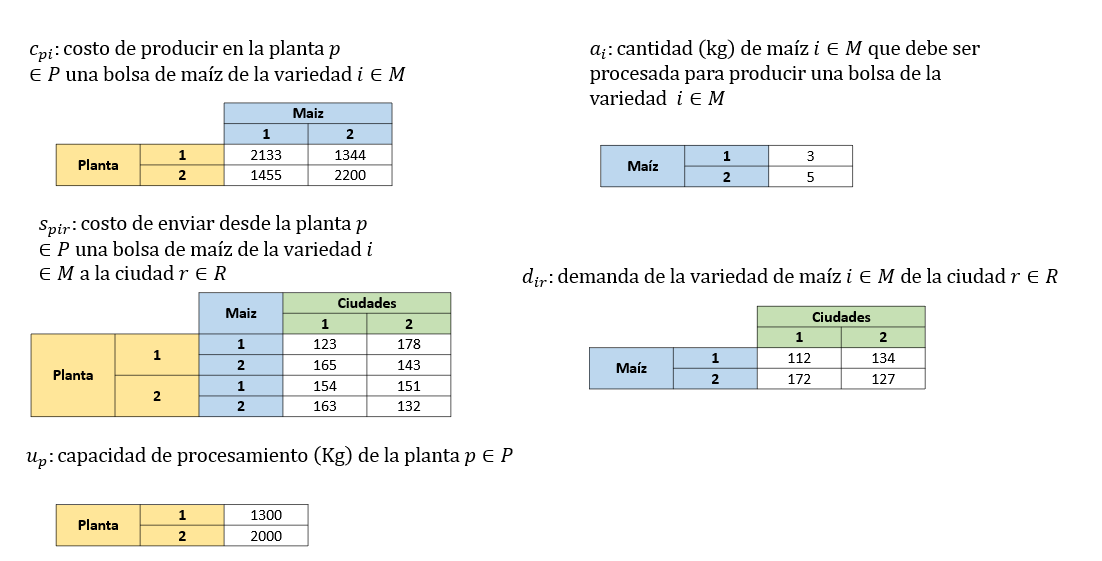


In [1]:
from docplex.mp.model import Model

In [2]:
## Conjuntos
P = [1, 2]
M = [1, 2]
R = [1, 2]

In [3]:
## Parámetros
c = {
    1: {1: 2133, 2: 1344}, 
    2: {1: 1455, 2: 2200},
}
d = {1: {1: 112, 2: 134}, 2: {1: 172, 2: 127}}
u = {1: 1300, 2: 2000}
a = {1: 3, 2: 5}

s = {
    (1, 1, 1): 123,
    (1, 1, 2): 178,
    (1, 2, 1): 165,
    (1, 2, 2): 143,
    (2, 1, 1): 154,
    (2, 1, 2): 151,
    (2, 2, 1): 163,
    (2, 2, 2): 132,
}


In [4]:
model = Model("Modelo Semillas")

$$ x_{pm} \in \mathbb{R}^{+}:  \text{cantidad de bolsas a producir en la planta } p \in P \text{ de la variedad de maíz } m \in M $$
$$ y_{pmr} \in \mathbb{R}^{+}:  \text{cantidad de bolsas a enviar desde la planta } p \in P \text{ de la variedad de maíz } m \in M \text{ a la ciudad } r \in R $$

In [5]:
x = model.continuous_var_dict([(p, m) for p in P for m in M], name="x")
y = model.continuous_var_dict([(p, m, r) for p in P for m in M for r in R], name="y")

$$ \text{minimizar FO: } \sum_{p \in P} \sum_{m \in M} c_{pm} x_{pm} + \sum_{p \in P} \sum_{m \in M} \sum_{r \in R} s_{pmr} y_{pmr} $$

In [6]:
costo1 = model.sum(c[p][m] * x[p, m] for p in P for m in M)
costo2 = model.sum(s[p, m, r] * y[p, m, r] for p in P for m in M for r in R)

model.minimize(costo1 + costo2)

$$ \forall p \in P: \sum_{m \in M} a_m x_{pm} \leq u_p $$

In [7]:
for p in P:
    model.add_constraint(model.sum(a[m] * x[p, m] for m in M) <= u[p])

$$ \forall m \in M \, \forall r \in R: \sum_{p \in P} y_{pmr} \geq d_{mr} $$

In [8]:
for m in M:
    for r in R:
        model.add_constraint(model.sum(y[p, m, r] for p in P) >= d[m][r])

# model.add_constraints([model.sum(y[p, m, r] for p in P) >= d[m][r] for m in M for r in R])


$$ \forall m \in M \, \forall p \in P: \sum_{r \in R} y_{pmr} = x_{pm} $$

In [9]:
for m in M:
    for p in P:
        model.add_constraint(model.sum(y[p, m, r] for r in R) == x[p, m])

In [10]:
solution = model.solve(log_output=True)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Aggregator did 4 substitutions.
Reduced LP has 6 rows, 8 columns, and 16 nonzeros.
Presolve time = 0.00 sec. (0.01 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =        259548.000000


In [11]:
solution.display()

solution for: Modelo Semillas
objective: 876764.000
status: OPTIMAL_SOLUTION(2)
x_1_2 = 260.000
x_2_1 = 246.000
x_2_2 = 39.000
y_1_2_1 = 172.000
y_1_2_2 = 88.000
y_2_1_1 = 112.000
y_2_1_2 = 134.000
y_2_2_2 = 39.000


In [12]:
model.objective_value

876764.0

In [13]:
costo1.solution_value

793170.0

In [14]:
costo2.solution_value

83594.0

In [15]:
for p in P:
    print(f"Planta {p}:")
    for m in M:
        print(f"  Semilla {m}: {x[(p, m)].solution_value}")

Planta 1:
  Semilla 1: 0
  Semilla 2: 260.0
Planta 2:
  Semilla 1: 246.0
  Semilla 2: 39.0


In [16]:

for p in P:
    print(f"Planta {p}:")
    for m in M:
        print(f"  Semilla {m}:")
        for r in R:
            print(f"    Ciudad {r}: {y[p, m, r].solution_value}")

Planta 1:
  Semilla 1:
    Ciudad 1: 0
    Ciudad 2: 0
  Semilla 2:
    Ciudad 1: 172.0
    Ciudad 2: 88.0
Planta 2:
  Semilla 1:
    Ciudad 1: 112.0
    Ciudad 2: 134.0
  Semilla 2:
    Ciudad 1: 0
    Ciudad 2: 39.0
